# Random Forest


Libraries and data.

In [60]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Data
# X_train_df = pd.read_csv('gold/X_train_df.csv', index_col='respondent_id') # training set features
h1n1_X_train_df = pd.read_csv('../data/gold/h1n1_X_train_df.csv', index_col='respondent_id') # training set features
seasonal_X_train_df = pd.read_csv('../data/gold/seasonal_X_train_df.csv', index_col='respondent_id') # training set features


training_set_labels_df = pd.read_csv('../data/raw/training_set_labels.csv', index_col='respondent_id') # training set labels

# X_test_df = pd.read_csv('gold/X_test_df.csv', index_col='respondent_id') # test set features
h1n1_X_test_df = pd.read_csv('../data/gold/h1n1_X_test_df.csv', index_col='respondent_id') # test set features
seasonal_X_test_df = pd.read_csv('../data/gold/seasonal_X_test_df.csv', index_col='respondent_id') # test set features

submission_format_df = pd.read_csv('../data/raw/submission_format.csv', index_col='respondent_id') # submission format

Data split for h1n1 and seasonal (each with its own variables).

In [61]:
h1n1_X_train, h1n1_X_test, h1n1_y_train, h1n1_y_test = train_test_split(h1n1_X_train_df, training_set_labels_df, test_size=0.2, random_state=42, stratify=training_set_labels_df)
seasonal_X_train, seasonal_X_test, seasonal_y_train, seasonal_y_test = train_test_split(seasonal_X_train_df, training_set_labels_df, test_size=0.2, random_state=42, stratify=training_set_labels_df)

Cross-validation.

In [62]:
# rfClassifier_h1n1 = RandomForestClassifier(random_state=42)
# rfClassifier_seasonal = RandomForestClassifier(random_state=42) 


In [63]:
# # Let's do GridSearchCV
# # parameters grid
# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "criterion" : ["gini", "entropy"],
#     "max_depth" : [None, 5, 10, 20, 30],
#     "min_samples_split" : [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "class_weight" :['balanced', 'balanced_subsample'],
#     "bootstrap" : [True, False]            # Si usar o no remuestreo (bootstrap). 
#     # class weight should be balanced or balanced_subsample - we have imbalance issue.
# } 

In [64]:
# # Initialize Grid Search
# grid_search_h1n1 = GridSearchCV(estimator=rfClassifier_h1n1, param_grid=param_grid,
#                            cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# # Fit the Grid Search model
# grid_search_h1n1.fit(h1n1_X_train, h1n1_y_train)

# # Print the best parameters and best score
# print("H1N1 Classifier: Best Parameters from Grid Search:", grid_search_h1n1.best_params_)
# print("H1N1 Classifier: Best cross-validation score (AUC):", grid_search_h1n1.best_score_)

# # Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
# # H1N1 Classifier: Best Parameters from Grid Search: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
# # H1N1 Classifier: Best cross-validation score (AUC): 0.8148497538789563


In [65]:
# # Initialize Grid Search
# grid_search_seasonal = GridSearchCV(estimator=rfClassifier_seasonal, param_grid=param_grid,
#                            cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# # Fit the Grid Search model
# grid_search_seasonal.fit(seasonal_X_train, seasonal_y_train)

# # Print the best parameters and best score
# print("Seasonal Classifier: Best Parameters from Grid Search:", grid_search_seasonal.best_params_)
# print("Seasonal Classifier: Best cross-validation score (AUC):", grid_search_seasonal.best_score_)

# # Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
# # Seasonal Classifier: Best Parameters from Grid Search: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
# # Seasonal Classifier: Best cross-validation score (AUC): 0.8202556895289412


Best hyperparameters.

In [66]:
h1n1_rf = RandomForestClassifier(random_state=42, bootstrap=True, class_weight= 'balanced_subsample', criterion='entropy', max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200)
seasonal_rf = RandomForestClassifier(random_state=42, bootstrap=False, class_weight= 'balanced', criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200)
  


The models (one for each prediction) are trained to study performance.

In [67]:
h1n1_rf.fit(h1n1_X_train, h1n1_y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=30, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [68]:
seasonal_rf.fit(seasonal_X_train, seasonal_y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42)

Predictions.

In [69]:
h1n1_preds = h1n1_rf.predict_proba(h1n1_X_test)
h1n1_preds_predict = h1n1_rf.predict(h1n1_X_test)

In [70]:
seasonal_preds = seasonal_rf.predict_proba(seasonal_X_test)
seasonal_preds_predict = seasonal_rf.predict(seasonal_X_test)

A dataframe is created with the predictions.

In [71]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': h1n1_preds[0][:,1],
        'seasonal_vaccine':seasonal_preds[1][:,1],
    },
    index=seasonal_y_test.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.053530,0.557270
1215,0.853524,0.788421
10540,0.106115,0.209502
7407,0.284396,0.418509
14697,0.306725,0.449690


### **RESULTS: ROC CURVE**

ROC curve to evaluate models.

In [72]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

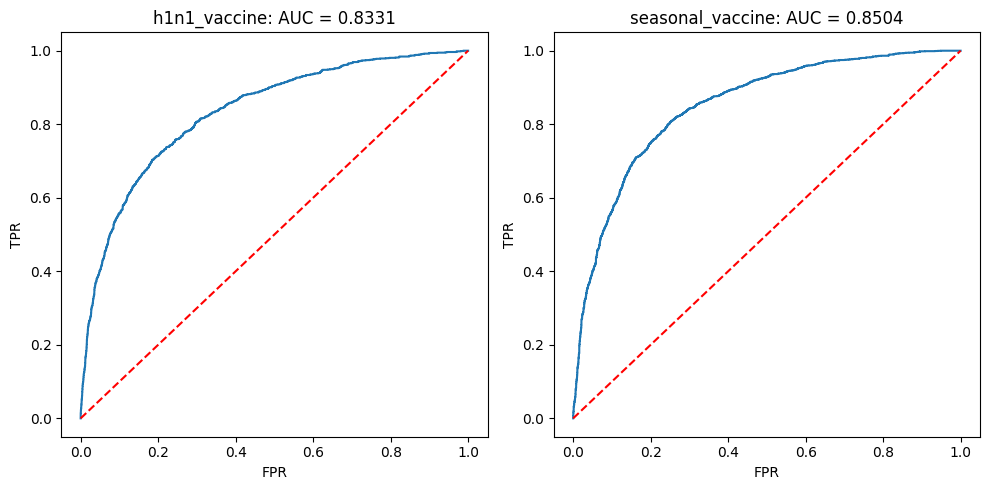

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_roc(
    h1n1_y_test['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0])

plot_roc(
    seasonal_y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1])

fig.tight_layout()

- AUC of 0.8641 for h1n1_vaccine: This indicates that the model has a good ability to distinguish between positive and negative classes. An AUC of 0.8641 is quite high, suggesting an effective model for predicting whether a person will receive the H1N1 vaccine.

- An AUC of 0.8502 indicates that the model performs well in predicting the seasonal vaccine, although it is a bit less accurate compared to the prediction for the H1N1 vaccine.

### **RESULTS: CONFUSION MATRIX**

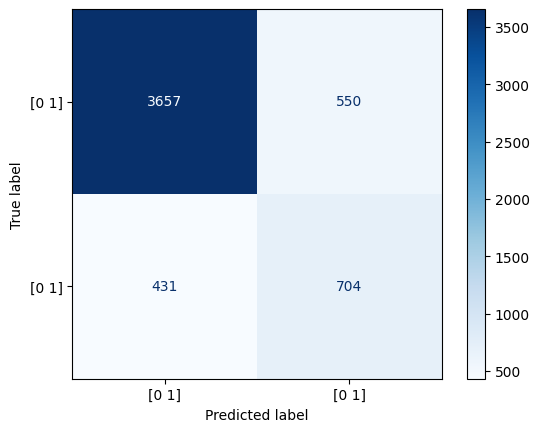

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4207
           1       0.56      0.62      0.59      1135

    accuracy                           0.82      5342
   macro avg       0.73      0.74      0.74      5342
weighted avg       0.82      0.82      0.82      5342



In [74]:
# h1n1_vaccine
cm = metrics.confusion_matrix(h1n1_y_test['h1n1_vaccine'], h1n1_preds_predict[:, 0])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=h1n1_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print the classification report
print(metrics.classification_report(h1n1_y_test['h1n1_vaccine'], h1n1_preds_predict[:, 0]))

In summary, the model performs well overall, with a precision of 0.89 for class 0 and 0.68 for class 1, meaning it is more accurate at predicting class 0. The recall is higher for class 0 (0.93) than for class 1 (0.56) (the model detects class 0 instances better).

The overall accuracy is 0.85, and the F1-score is quite good, especially for class 0, suggesting a good balance between precision and recall. However, the model struggles to correctly identify class 1, as seen in its lower precision and recall for this class.

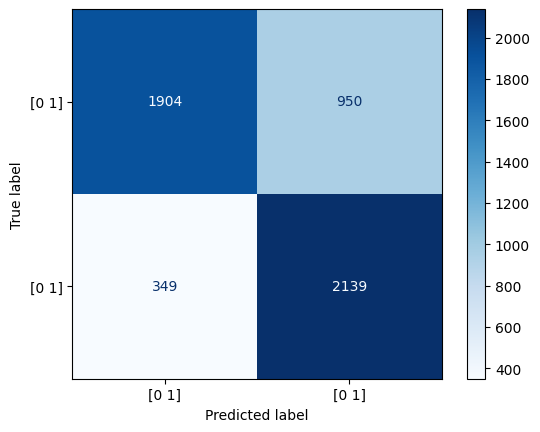

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      2854
           1       0.69      0.86      0.77      2488

    accuracy                           0.76      5342
   macro avg       0.77      0.76      0.76      5342
weighted avg       0.77      0.76      0.76      5342



In [75]:
# seasonal_vaccine
cm = metrics.confusion_matrix(seasonal_y_test['seasonal_vaccine'], seasonal_preds_predict[:, 1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=seasonal_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print the classification report
print(metrics.classification_report(seasonal_y_test['seasonal_vaccine'], seasonal_preds_predict[:, 1]))

In summary, the model performs fairly well, with a precision of 0.79 for class 0 and 0.76 for class 1, meaning it is slightly more accurate at predicting class 0. The recall is also similar for both classes, with 0.79 for class 0 and 0.76 for class 1, showing that the model detects both classes fairly well.

The overall accuracy is 0.77, and the F1-score is the same for both classes (0.79 for class 0 and 0.76 for class 1), indicating a decent balance between precision and recall. The results are consistent across both classes, with the model performing similarly for both.

### **FIT AND PREDICT RESULTS FOR COMPETITION UPLOAD**

The models (one for each prediction) are trained for the competition.

In [76]:
h1n1_rf.fit(h1n1_X_train_df, training_set_labels_df)
h1n1_preds = h1n1_rf.predict_proba(h1n1_X_test_df)
h1n1_preds

[array([[0.73895508, 0.26104492],
        [0.89820729, 0.10179271],
        [0.31276039, 0.68723961],
        ...,
        [0.83841564, 0.16158436],
        [0.79397879, 0.20602121],
        [0.40017666, 0.59982334]]),
 array([[0.54347503, 0.45652497],
        [0.92486521, 0.07513479],
        [0.15445496, 0.84554504],
        ...,
        [0.74242478, 0.25757522],
        [0.52947216, 0.47052784],
        [0.37478157, 0.62521843]])]

In [77]:
seasonal_rf.fit(seasonal_X_train_df, training_set_labels_df)
seasonal_preds = seasonal_rf.predict_proba(seasonal_X_test_df)
seasonal_preds

[array([[0.62804409, 0.37195591],
        [0.81408408, 0.18591592],
        [0.34414285, 0.65585715],
        ...,
        [0.61229533, 0.38770467],
        [0.57963059, 0.42036941],
        [0.44543678, 0.55456322]]),
 array([[0.61773062, 0.38226938],
        [0.8537256 , 0.1462744 ],
        [0.16119434, 0.83880566],
        ...,
        [0.61604155, 0.38395845],
        [0.44655722, 0.55344278],
        [0.2799935 , 0.7200065 ]])]

A dataframe is created with the predictions.

In [78]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': h1n1_preds[0][:,1],
        'seasonal_vaccine':seasonal_preds[1][:,1],
    },
    index=h1n1_X_test_df.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.261045,0.382269
26708,0.101793,0.146274
26709,0.687240,0.838806
26710,0.733075,0.904329
26711,0.397897,0.627794


Export the CSV.

In [79]:
y_preds.to_csv('../results/pred_random_forest_output_partition.csv', index = True)